In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import pie, axis, show
from matplotlib import cm
%matplotlib inline

data = pd.read_csv('../Test_Data/astronauts.csv')
data.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


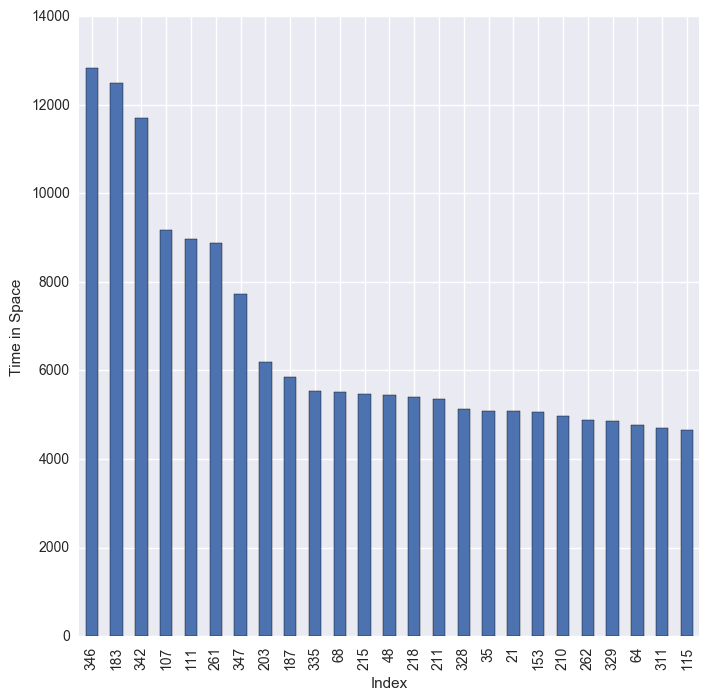

In [2]:
data = data.sort('Space Flight (hr)', ascending=[0])


plt.figure(figsize=(8,8))
data['Space Flight (hr)'].head(25).plot.bar()
plt.xlabel('Index')
plt.ylabel('Time in Space')



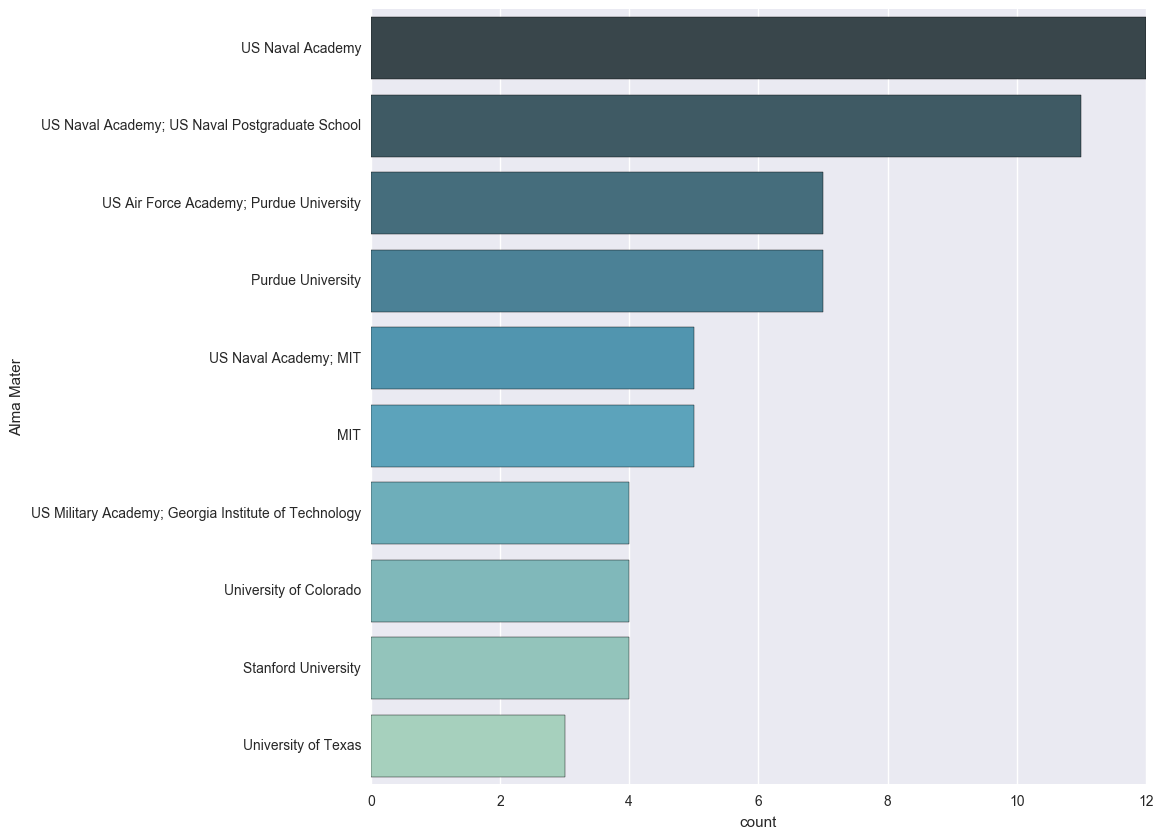

In [3]:
countCollege=data["Alma Mater"].value_counts()
plt.figure(figsize=(10,10))
UniversitiesGraph = sns.countplot(y="Alma Mater", data=data,
                   order=countCollege.nlargest(10).index,
                   palette='GnBu_d')
plt.show()

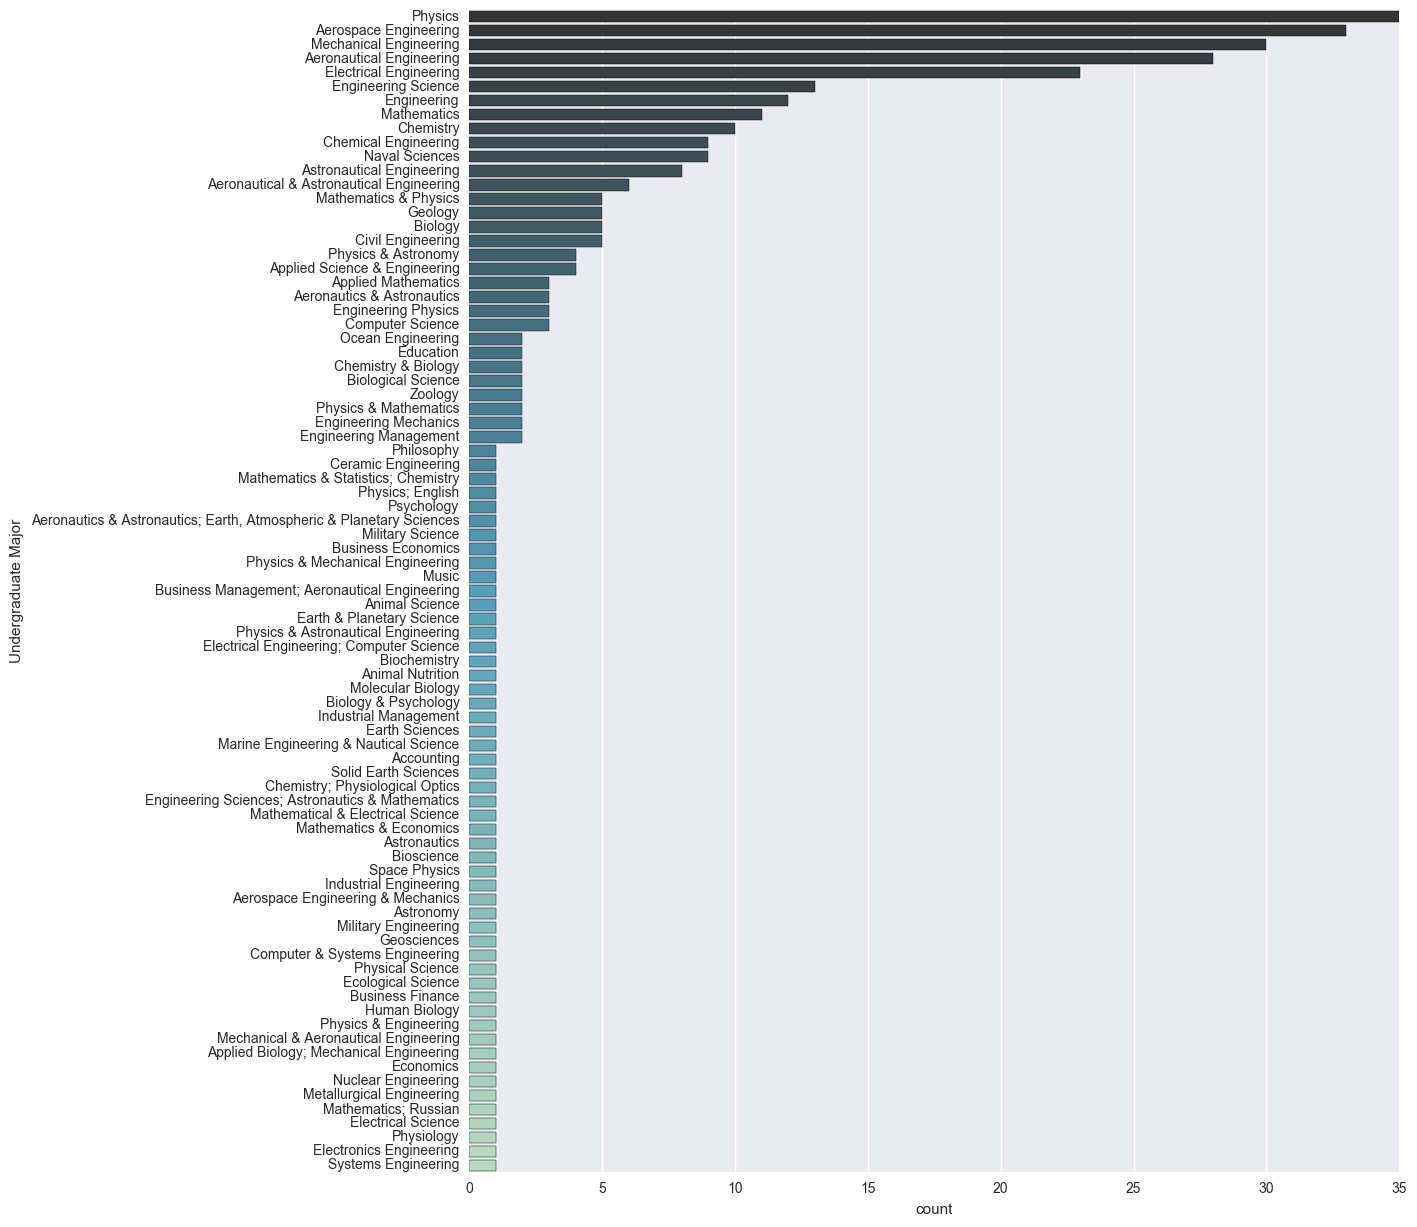

In [4]:
CollegeCount = data['Undergraduate Major'].value_counts()
plt.figure(figsize=(12,15))
CollegeGraph = sns.countplot(y="Undergraduate Major", data=data,
                   order=CollegeCount.index,
                   palette='GnBu_d')
plt.show()

In [6]:
print("Total out of 356: ", data['Graduate Major'].count(), "has a Graduate Degree")
graduateCount = data['Graduate Major'].count()
result = graduateCount/356 * 100
result = format(result, '.2f')
print(result, '%')
#print(data['Graduate Major'].value_counts())



('Total out of 356: ', 298, 'has a Graduate Degree')
('0.00', '%')


In [7]:
data['Was Military?'] = data['Military Rank'].apply(lambda x: 0 if type(x) == float else 1)
data['Was Military?'].replace([0, 1], ["Wasn't Military", "Was Military"], inplace=True)

Was Military       207
Wasn't Military    150
Name: Was Military?, dtype: int64


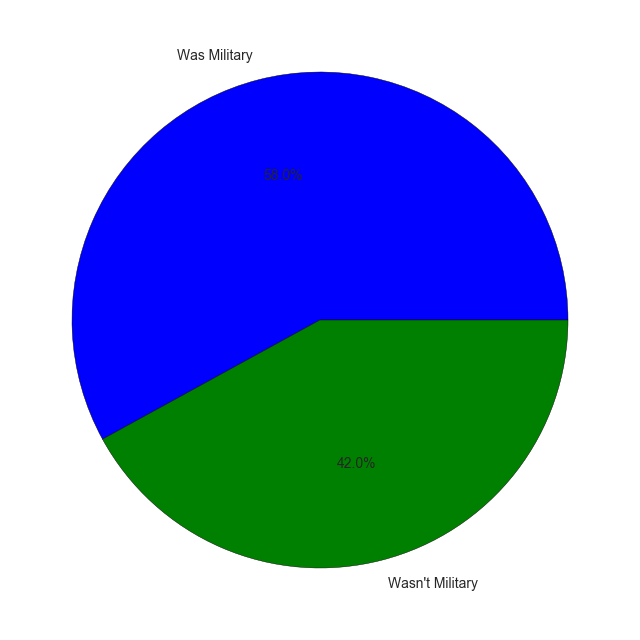

In [8]:
militaryGraph2 = data['Was Military?'].value_counts()
print(militaryGraph2)

plt.figure(figsize=(8,8))
pie(militaryGraph2, labels=militaryGraph2.index, autopct='%1.1f%%');
plt.show()



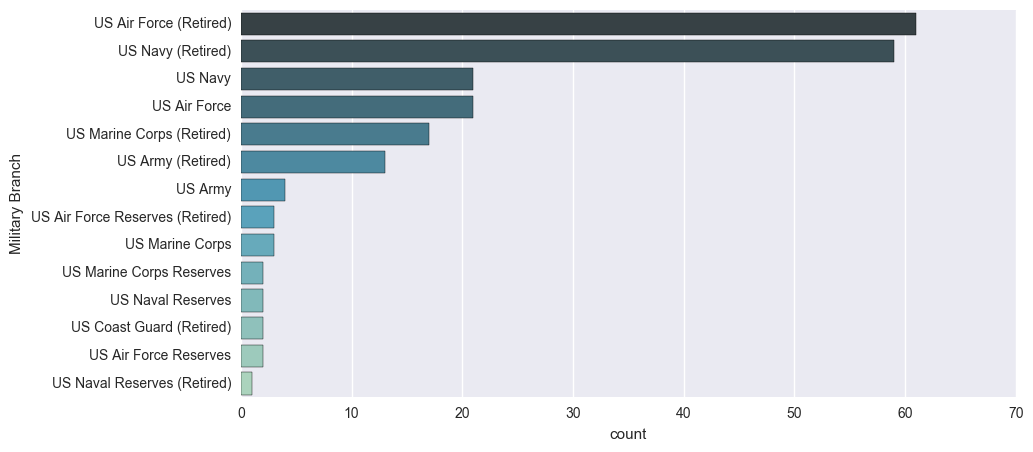

In [9]:
plt.figure(figsize=(10,5))
BranchGraph = sns.countplot(y="Military Branch", data=data,
                   order=data['Military Branch'].value_counts().index,
                   palette='GnBu_d')
plt.show()

Male      307
Female     50
Name: Gender, dtype: int64


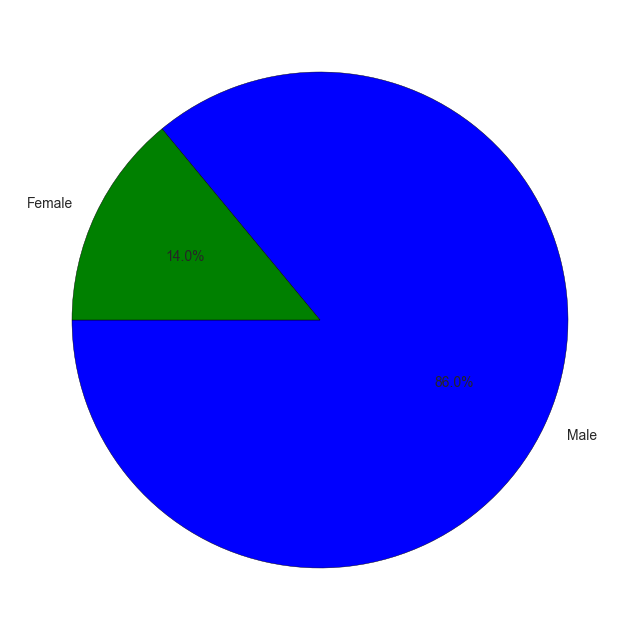

In [10]:
Gender = data['Gender'].value_counts()
print(Gender)

plt.figure(figsize=(8,8))
pie(Gender, labels=Gender.index, autopct='%1.1f%%', startangle=180)

plt.show()